# Application Test for Economist Position

[](http://)**This notebook was submitted as part of a test for a job recruitment of an economist. Please feel free to comment, like, and share feedback! Here were the instructions:**

Data Analysis and Writing Test (total estimated time: 2 hours)

You have 24 hours to complete this assignment. The 24-hour countdown begins after this
document and associated data file are sent to you.
Send the three outputs (data script, plot of data and short writing up) directly to xxx.

There are two elements to this test (A and B) which are explained below:

**A) Data Analysis** <br>
Objective: Using the data provided, generate a data visualization in a scripting language of
your choice (e.g., R, Python, SAS, Stata, etc.)

Deliverable:
> a) script file containing all loading, processing and export steps (e.g., *.do, *.r, *.py, etc.)

Time Allotment: A maximum of one (1) hour <br>
Detailed Instructions:
- Generate a **line plot** of the **annual employment growth rate** (i.e., year-over-year percent
changes) from **January 2007** to the most recent data point available (November 2019)
for the following **two provinces**: Alberta and Ontario
- All data manipulations and calculation of variables must be done in the scripting
language of choice. No changes should be made to the data in the CSV file prior to
loading it into your data environment
- The final script should show all steps in the process:
loading the data, manipulating the data and calculating required variables, generating the plot, and exporting the plot image. Including explanatory comments within the script is recommended, but not required.

**B) Writing Assignment** <br>
Objective: Write a blog post for a non-technical external audience explaining the most salient patterns shown in the data visualization produced in part A of this test.

Deliverable:
> a) MS Word file with a draft blog post

Time Allotment: A maximum of one (1) hour. <br>
Detailed Instructions:
- Describe the patterns observed in the plot generated, and provide some explanation as
to why the employment growth rates in the 2 provinces move together or diverge during
the past 13 years
- The blog post can be written in the language of your choice (English or French) (If written in English, the blog should be between 200 and 500 words in length, if written in French, the blog should be between 300 and 800 words in length)
- Formatting of the text in the Word document does not matter.

**A) DATA ANALYSIS**

> ## Loading the data

In [1]:
#Matplotlib for data visualization
import matplotlib.pyplot as plt
#Numpy for aggregate statistics
import numpy as np
#Datetime for organizing dates
import datetime
#Pandas for data manipulation and analysis
import pandas as pd
df = pd.read_csv('../input/example_data.csv')

In [2]:
#First read the data: view all columns, all rows, and check if there is any missing or bad data

df.head(5)
#df.dtypes
#df.columns
#df.iloc[0:-1]
#df['month'].unique()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,1976-01,Full-time employment,Both sexes,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


## Manipulating the data and calculating required variables

In [3]:
#Then, read Alberta and Ontario only between Jan 2007 to Nov 2019

df = df[['month','variable','sex','Alberta','Ontario']]

#df.loc[df['month'] == '2007-01']
#df.iloc[3347]

df = df.iloc[3348:-1]
df

,month,variable,sex,Alberta,Ontario
3348,2007-01,Employment,Both sexes,1962.9,6499.9
3349,2007-01,Employment,Females,880.9,3107.2
3350,2007-01,Employment,Males,1082.0,3392.7
3351,2007-01,Full-time employment,Both sexes,1656.1,5292.7
3352,2007-01,Full-time employment,Females,662.7,2285.3
...,...,...,...,...,...
4737,2019-11,Full-time employment,Both sexes,1922.4,6120.2
4738,2019-11,Full-time employment,Females,788.4,2708.6
4739,2019-11,Full-time employment,Males,1134.0,3411.6
4740,2019-11,Part-time employment,Both sexes,416.3,1398.2


In [4]:
#For the purposes of this task, we are interested in the total employment for both sexes
df = df.loc[(df['variable'] == 'Employment') & (df['sex'] == 'Both sexes')]
df

,month,variable,sex,Alberta,Ontario
3348,2007-01,Employment,Both sexes,1962.9,6499.9
3357,2007-02,Employment,Both sexes,1971.9,6511.0
3366,2007-03,Employment,Both sexes,1971.9,6518.0
3375,2007-04,Employment,Both sexes,1978.5,6507.3
3384,2007-05,Employment,Both sexes,1978.2,6521.6
...,...,...,...,...,...
4698,2019-07,Employment,Both sexes,2343.7,7420.3
4707,2019-08,Employment,Both sexes,2344.3,7478.1
4716,2019-09,Employment,Both sexes,2349.2,7519.2
4725,2019-10,Employment,Both sexes,2356.9,7503.0


In [5]:
#Drop redundant columns 'variable' and 'sex' because all values equal 'Employment' and 'Both sexes' respectively

df = df.drop(columns=['variable', 'sex'])

#Reset index for simplicity

df.reset_index(drop=True, inplace=True)
df

#Dataframe now represents total employment in Alberta and Ontario, by month, from January 2007 to November 2019

,month,Alberta,Ontario
0,2007-01,1962.9,6499.9
1,2007-02,1971.9,6511.0
2,2007-03,1971.9,6518.0
3,2007-04,1978.5,6507.3
4,2007-05,1978.2,6521.6
...,...,...,...
150,2019-07,2343.7,7420.3
151,2019-08,2344.3,7478.1
152,2019-09,2349.2,7519.2
153,2019-10,2356.9,7503.0


In [6]:
#Group data by year so to calculate annual growth rate
#Column month is an object and must be changed to datetime
df.dtypes

month       object
Alberta    float64
Ontario    float64
dtype: object

In [7]:
df['month'] = pd.to_datetime(df['month'].astype(str), format='%Y%')
df

,month,Alberta,Ontario
0,2007-01-01,1962.9,6499.9
1,2007-02-01,1971.9,6511.0
2,2007-03-01,1971.9,6518.0
3,2007-04-01,1978.5,6507.3
4,2007-05-01,1978.2,6521.6
...,...,...,...
150,2019-07-01,2343.7,7420.3
151,2019-08-01,2344.3,7478.1
152,2019-09-01,2349.2,7519.2
153,2019-10-01,2356.9,7503.0


In [8]:
#Check to see is month column is now datetime object
df.dtypes

month      datetime64[ns]
Alberta           float64
Ontario           float64
dtype: object

In [9]:
#Rename column month to Year, and for clarity rename Alberta to Alberta Employment and Ontario to Ontario Employment

df.columns = ['Year', 'Alberta Employment', 'Ontario Employment']

In [10]:
#Group data by year
grouped = df.groupby(df['Year'].map(lambda x: x.year), as_index=False)

#View months seperated by year of employment in Alberta and Ontario
for year,group in grouped:
    print (year)
    print (group)
    
#Check to see if data is still accurate
#grouped.size()
#grouped.describe()

2007
         Year  Alberta Employment  Ontario Employment
0  2007-01-01              1962.9              6499.9
1  2007-02-01              1971.9              6511.0
2  2007-03-01              1971.9              6518.0
3  2007-04-01              1978.5              6507.3
4  2007-05-01              1978.2              6521.6
5  2007-06-01              1989.5              6530.0
6  2007-07-01              1999.0              6558.8
7  2007-08-01              2001.6              6559.4
8  2007-09-01              2004.8              6578.1
9  2007-10-01              2004.3              6610.0
10 2007-11-01              2007.2              6586.2
11 2007-12-01              2027.6              6569.6
2008
         Year  Alberta Employment  Ontario Employment
12 2008-01-01              2030.2              6578.8
13 2008-02-01              2030.2              6626.7
14 2008-03-01              2038.2              6605.8
15 2008-04-01              2044.6              6623.0
16 2008-05-01     

In [11]:
#Next step is to create dataframe by year from Jan 2007 to Nov 2019

#Include Jan 2007 in new df so to be inclusive of annual employment growth rate since Jan 2007
start = df.iloc[0:1]
#start

#Determine last value of each year (Dec 2007, Dec 2008, etc.) to use for calculating annual growth rate
df = grouped.last()
#df

#Combine start and df dataframes so our scope is now organized by year between Jan 2007 to Nov 2019
df = start.append(df)

#Reset the index
df.reset_index(drop=True, inplace=True)
df

,Year,Alberta Employment,Ontario Employment
0,2007-01-01,1962.9,6499.9
1,2007-12-01,2027.6,6569.6
2,2008-12-01,2052.9,6576.2
3,2009-12-01,2035.7,6451.6
4,2010-12-01,2036.8,6602.1
5,2011-12-01,2145.4,6682.6
6,2012-12-01,2196.6,6768.9
7,2013-12-01,2242.0,6845.2
8,2014-12-01,2301.9,6879.1
9,2015-12-01,2281.4,6963.1


In [12]:
#Determine annual growth rate year-over-year
df[['AC%','OC%']]=df.sort_values(['Year'])[['Alberta Employment','Ontario Employment']].pct_change()*100
df

,Year,Alberta Employment,Ontario Employment,AC%,OC%
0,2007-01-01,1962.9,6499.9,NaN,NaN
1,2007-12-01,2027.6,6569.6,3.296143,1.072324
2,2008-12-01,2052.9,6576.2,1.247781,0.100463
3,2009-12-01,2035.7,6451.6,-0.837839,-1.894711
4,2010-12-01,2036.8,6602.1,0.054035,2.332755
5,2011-12-01,2145.4,6682.6,5.331893,1.219309
6,2012-12-01,2196.6,6768.9,2.386501,1.291414
7,2013-12-01,2242.0,6845.2,2.066831,1.127214
8,2014-12-01,2301.9,6879.1,2.671722,0.495238
9,2015-12-01,2281.4,6963.1,-0.890569,1.221090


In [13]:
#Double check 
((2052.9-2027.6)/2027.6)*100

1.2477806273426801

In [14]:
#Compare the percentage change data
#df['AC%'].describe()
#df['OC%'].describe()

## Generating the plot and exporting the plot image

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


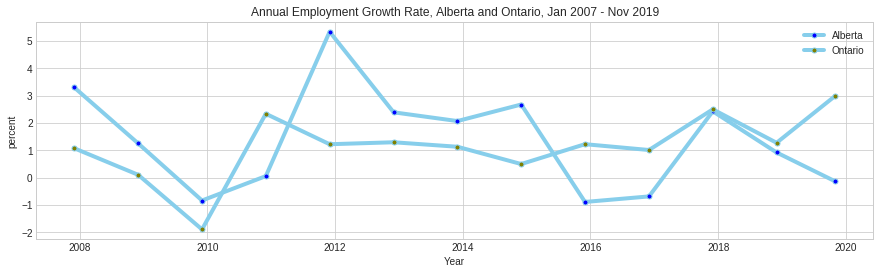

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,4))
plt.plot( 'Year', 'AC%', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=4, label="Alberta")
plt.plot( 'Year', 'OC%', data=df, marker='o', markerfacecolor='olive', markersize=5, color='skyblue', linewidth=4, label="Ontario")
plt.legend()
plt.xlabel('Year')
plt.ylabel('percent')
plt.title('Annual Employment Growth Rate, Alberta and Ontario, Jan 2007 - Nov 2019')
plt.savefig('Annual_Employment_Growth_Rate_Alberta_Ontario_2007_2019.png')

**B) WRITING ASSIGNMENT**

**Ontario sees hike in employment rate in 2019 while Alberta declines**
<br> 9 November 2019

A recent study by the Labour Market Information Council (LMIC) comparing annual employment growth rates in the last 13 years shows that Ontario and Alberta see similar fluctuations in the rate of employment, but it is Alberta that experiences these fluctuations more severely. However, since the start of 2019 the two provinces have diverged with Ontario experiencing a hike of 2.89% in employment growth and Alberta declining by 0.14%. 

In recent previous years, there were commonalities in the fluctuations of the rate of employment between the two provinces. For example, both provinces experienced a drop and rise in employment rates during the recession and recovery of the economic crisis which began in 2007. An interesting finding is that employment rate fluctuates much more drastically for Alberta than Ontario. The standard deviation in the change of employment rate for Alberta is 1.87% compared to 1.21% for Ontario which means that on average, Alberta’s employment rate deviates from the norm more so than Ontario’s. 

In 2019, Statistics Canada estimated that employment in Alberta in natural resources declined by 9.9%. So, although trends in employment rate for Ontario and Alberta tend to move together, why do they fluctuate at different accords? How do each of these provinces act and react to shifting national and international environments?

The study conducted by LMIC was all-inclusive of specifications such as full-time and part-time employment amongst both males and females. Further studies could extract insights from these differing groups and include sector-specific data so to look more into the types and conditions of employment rate growth in Ontario and Alberta.